In [1]:
import os
import numpy as np

path = 'dataset/'

list_array = []
list_label = []

for subdir, dirs, files in os.walk(path):
    
    for file_ in files:
        
        with open(subdir+file_) as f:
            
            #content = f.readlines()
            
            list_array_ = f.read().split('\n')[:-1]
            #print len(list_array_)
            
            for array in list_array_:
                
                #print file_[:-4]
                list_label.append(file_[:-4])
                
                np_array = np.fromstring(array[1:-1], sep=',')
                list_array.append(np_array)

#print len(list_array)
#print len(list_label)

In [2]:
#print list_array

X_array = np.vstack(list_array)
print X_array.shape

#print list_label

y_label = np.vstack(list_label)
print y_label.shape

(7395L, 5L)
(7395L, 1L)


* ROC
* Cross-validation
* Confusion Matrix

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=9)
    plt.yticks(tick_marks, classes, fontsize=9)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        #plt.text(j, i, format(cm[i, j], fmt),
                 #horizontalalignment="center",
                 #color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_confusion(X, y, classifier, normalize=False):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    class_names = np.unique(y_label)
    
    # Run classifier, using a model that is too regularized (C too low) to see
    # the impact on the results
    #classifier = svm.SVC(kernel='linear', C=0.01)
    
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    
    if normalize:
        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=class_names,
                              title='Confusion matrix, without normalization')
    else:
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                              title='Normalized confusion matrix')

    plt.show()
    
def print_roc(fprs, tprs, roc_aucs, lw=2):
    plt.figure()
    
    for fpr, tpr, roc_auc in zip(fprs, tprs, roc_aucs):
        plt.plot(fpr, tpr, lw=lw)
        
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    #plt.title(title)
    #plt.legend(loc="lower right")
    plt.show()
    
def roc_cross_val(X, y, clf, n_split):

    cv = StratifiedKFold(n_splits=n_split)
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    
    fprs = [mean_fpr]
    tprs = [mean_tpr]
    roc_aucs = [0.0]

    for train, test in cv.split(X, y):
        #y = label_binarize(y, classes=[0, 1, 2, 3, 4])
        probas_ = clf.fit(X[train], y[train]).predict_proba(X[test])
        fpr, tpr, thresholds = roc_curve(y[test].ravel(), probas_[:,1].ravel())
        #fpr, tpr, thresholds = roc_curve(y[test].ravel(), probas_.ravel())
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        
        fprs.append(fpr)
        tprs.append(tpr)
        roc_aucs.append(roc_auc)
        
    mean_tpr /= n_split
    
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    
    fprs[0] = mean_fpr
    tprs[0] = mean_tpr
    roc_aucs[0] = mean_auc
    
    return fprs, tprs, roc_aucs

def plot_roc(X, y, clf, n_split):
    
    fprs, tprs, roc_aucs = roc_cross_val(X, y, clf, n_split)
    fprs_.append(fprs[0])
    tprs_.append(tprs[0])
    roc_aucs_.append(roc_aucs[0])
    
    print_roc(fprs_, tprs_, roc_aucs_, lw=2)

socre: 0.931034482759
Normalized confusion matrix


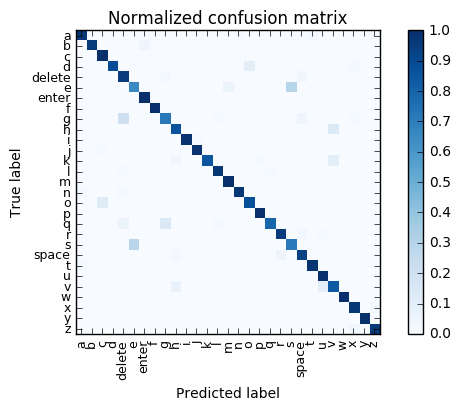

In [5]:
from sklearn import linear_model

#train
logistic = linear_model.LogisticRegression(C=1e5)
#print logistic.fit(X_array, y_label)

print 'socre:', logistic.fit(X_array, y_label).score(X_array, y_label)

#scores = cross_val_score(logistic, X_array, y_label, cv=29)
#print 'cross_val_score:', (scores.mean())

plot_confusion(X_array, y_label, logistic)
#plot_roc(X_array, y_label, logistic, 3)

socre: 0.993373901285
Normalized confusion matrix


D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


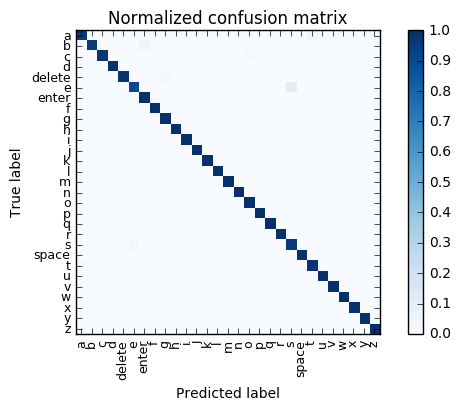

In [7]:
from sklearn import neighbors

#train
knn = neighbors.KNeighborsClassifier()

print 'socre:', knn.fit(X_array, y_label).score(X_array, y_label)

plot_confusion(X_array, y_label, knn)

socre: 0.996484110886
Normalized confusion matrix


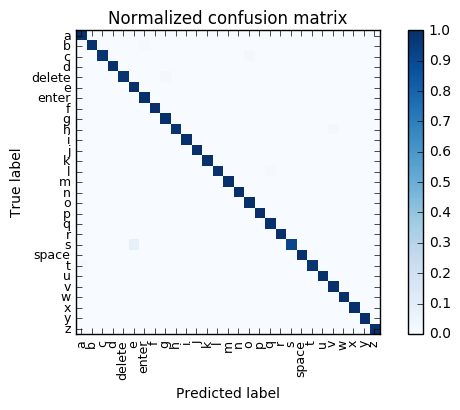

In [8]:
from sklearn import svm

#train
svm_ = svm.SVC(gamma=0.001, C=100.)

print 'socre:', svm_.fit(X_array, y_label).score(X_array, y_label)

plot_confusion(X_array, y_label, svm_)

socre: 0.999594320487
Normalized confusion matrix


D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


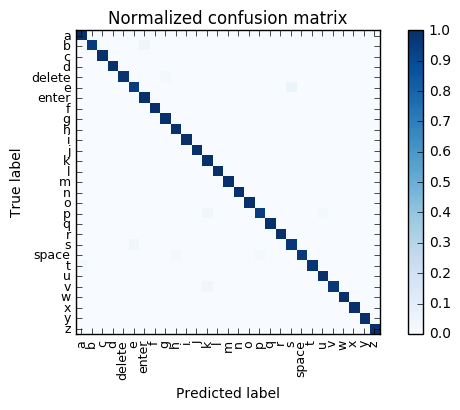

In [9]:
from sklearn.ensemble import RandomForestClassifier  

#train
rfc = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)

print 'socre:', rfc.fit(X_array, y_label).score(X_array, y_label)

plot_confusion(X_array, y_label, rfc)

socre: 0.993914807302
Normalized confusion matrix


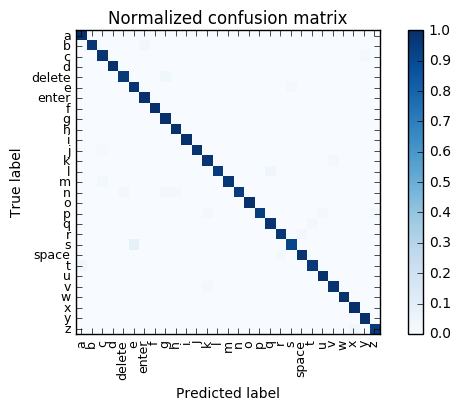

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

#train
gbc = GradientBoostingClassifier(random_state=1,n_estimators=25,max_depth=3)

print 'socre:', gbc.fit(X_array, y_label).score(X_array, y_label)

plot_confusion(X_array, y_label, gbc)

In [12]:
models = {'lg': logistic, 'knn': knn, 'svm': svm_, 'rfc': rfc, 'gbc': gbc};

In [13]:
data = {'X_array': X_array, 'y_label': y_label, 'models': models}

In [14]:
import cPickle

f = open('model.pkl', 'wb')
cPickle.dump(data, f)
f.close()